<a href="https://colab.research.google.com/github/gontay/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is just my attempt to understand NLP and explore Language with ML and NN.

Goals:
1. Identify optimal format for speech samples.
2. Identify medium of data for learning raw unprocessed vs image(Spectogram and Waveform)
3. Apply NN or ML
4. Get emotional tone from soundbite

# Theory Crafting

## Analog Audio
Analog Audio is hard to explain b'cos I'm small brained. But essentially the sounds are not processed in anyway by a computer so in theory you just get the sound as it is. Imagine this sentence as a smooth line with of word going into your ear.

`"I am a bad explainer of things but I try my best."`

## Digital Audio
Digital Audio is audio but digital. So digital introduces a hypotetical information lost due to the limitation computers. Imagine that the sentence took 10 seconds to complete and you took 1 small sample every second for this example. It would look something like this.

`"I a ad expl of ings ut I tr m est"`

### *Sampling Rate*
Now what if I take more samples every second? I collect more information as I have more samples in each second. So I it might look something like this:

`"I m a bd explain of thing bu I tr my bes"`

But what really happens is that you would get poorer quality audio if you have a low sampling rate.

### Shannon Nyquist Theorem
I'm mathematically illiterate at this point but I know that you want your sampling rate to be 2x your highest frequency you are recording which for human hearing, is about 220000Hz thus an ideal sampling rate is would be around 44000Hz. What happens if your sampling rate is bad? Aliasing. i.e. shitty mic affect.

### Possible Bottlenecks
You want to achieve a high sampling rate but can your microphone, your computer's audio card support such a sampling rate?

# Code for Audio Input

In [9]:
##Record and save
from IPython.display import Javascript,display
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record_save(sec=3, samplerate=48000):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))

  audio = audio.set_frame_rate(samplerate)

  with open('audio.wav','wb') as f:
    audio.export(f, format='wav')
  return 'audio.wav'  # or webm ?

<IPython.core.display.Javascript object>

Sample rate: 48000 Hz


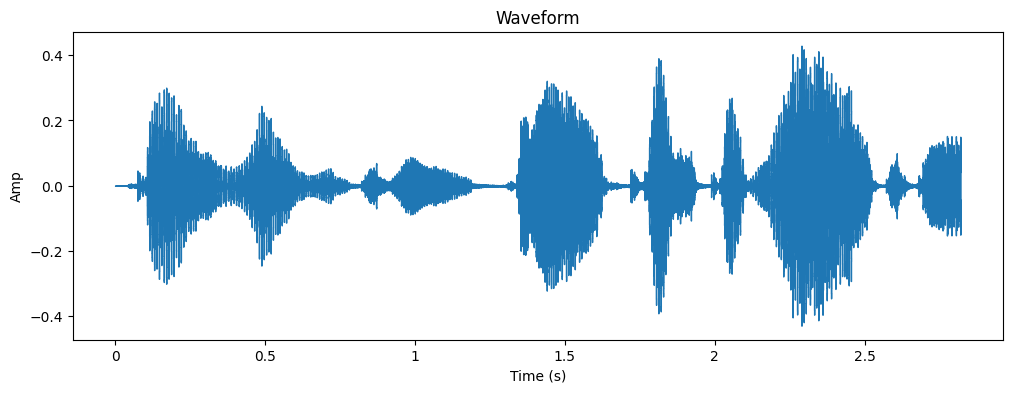

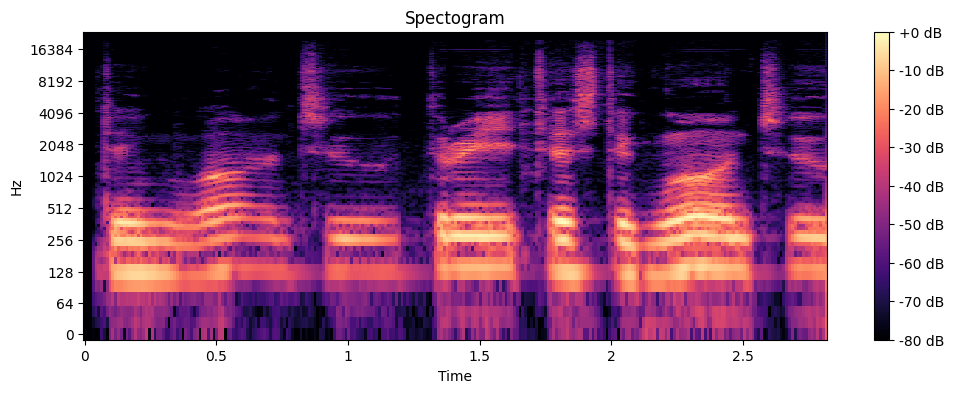

Sample rate: 22050 Hz


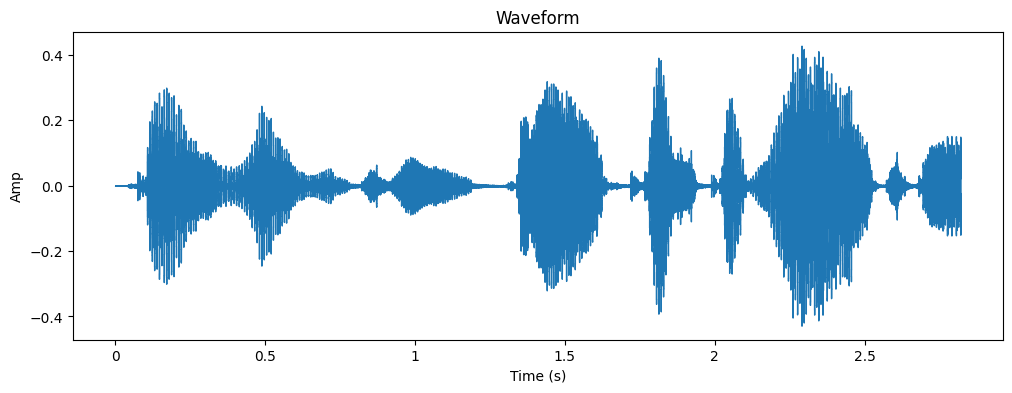

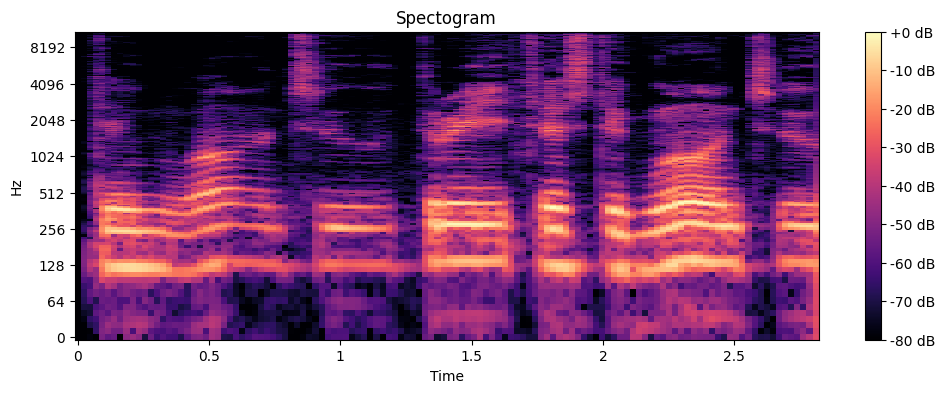

Sample rate: 8000 Hz


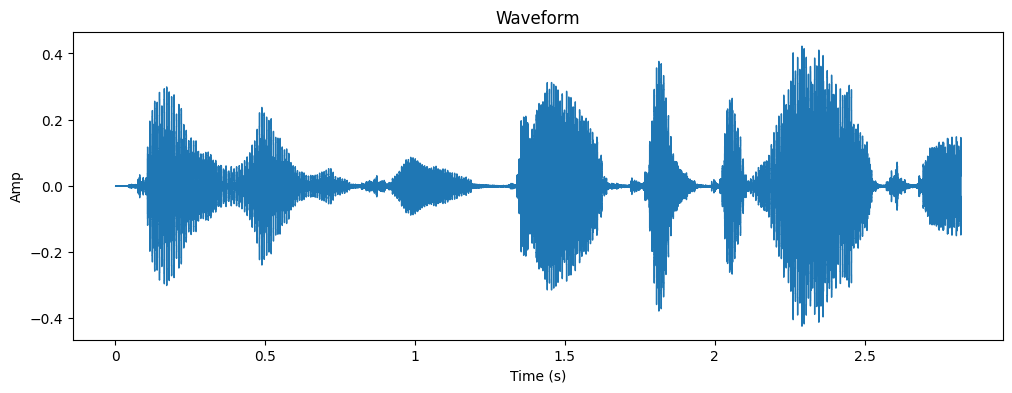

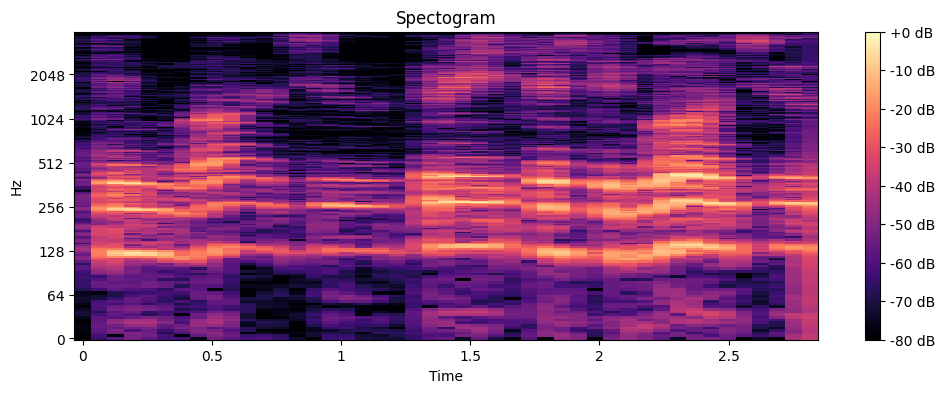

Sample rate: 4000 Hz


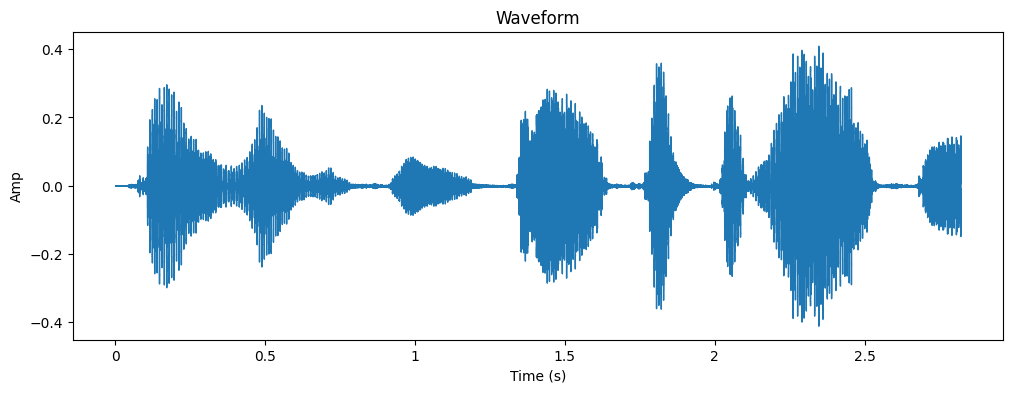

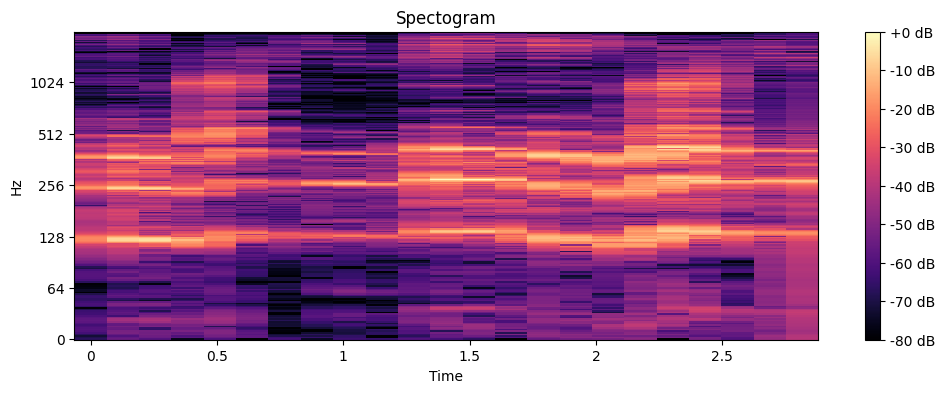

In [10]:
##Input Wave Recording and output visualisation
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
from IPython.display import Audio

def visualise_audio(audio_file,samplingrate=22050):
  y, sr = librosa.load(audio_file, sr=samplingrate)
  print(f"Sample rate: {sr} Hz") # Print the sample rate
  plt.figure(figsize=(12,4))
  librosa.display.waveshow(y, sr=sr)
  plt.title('Waveform')
  plt.xlabel('Time (s)')
  plt.ylabel('Amp')
  plt.show()

  D = librosa.stft(y)
  S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

  plt.figure(figsize=(12,4))
  librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
  plt.title('Spectogram')
  plt.colorbar(format='%+2.0f dB')
  plt.show()

##Down Sampling Audio
def downsampleAudio(audio_file, samplingrate = 8000):
  y, sr = librosa.load(audio_file, sr=samplingrate)
  sf.write('downsampled.wav',y,samplingrate)

##Record 3 Seconds of Audio and visualise waveform and spectogram
record_save(3)
visualise_audio('audio.wav',48000)
visualise_audio('audio.wav')
visualise_audio('audio.wav',8000)
visualise_audio('audio.wav',4000)
Audio('audio.wav', autoplay=True)

In [12]:
import soundfile as sf
import librosa

def downsampleAudio(audio_file, samplingrate = 4000):
  y, sr = librosa.load(audio_file, sr=samplingrate)
  sf.write('downsampled.wav',y,samplingrate)

downsampleAudio('audio.wav', 4000)
Audio('downsampled.wav', autoplay=True)

Sampling rate does not affect loudness, it affects resolution. The amplitude(power), "how loud it is to us" does not change.

# Language and Speech

## Theory Crafting

When we hear a person speaking, how do we know the what the words are and what is what? The short answer, brain is good at pattern recognition and certain nerual firings occur for each combination of sound.

simple understanding:


1. Hear a sound which has varying amplitudes at different frequencies
2. Neuron 1, Neuron 2 and neuron 3 fires for corresponding frequencies
3. From neural pattern you perceive "E".

This is a simple conceptual explaination. Of course there certainly more variables like tonal shifts or breaks that make complex patterns that makes up a whole sequence of consonant and vowel sounds, which forms a word, of which a sequence of words forms a sentence and so on...

